In [1006]:
import pandas as pd
import matplotlib.pyplot as plt

In [1007]:
# Task 1

# Load df using pandas
data_titanic = '/Users/reynasingh/ML-fundamentals-2025/titanic3.xls'
df = pd.read_excel(data_titanic)

# Printing df head to get a preview of columns and titles
print(df.head())
print(df.info())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
me

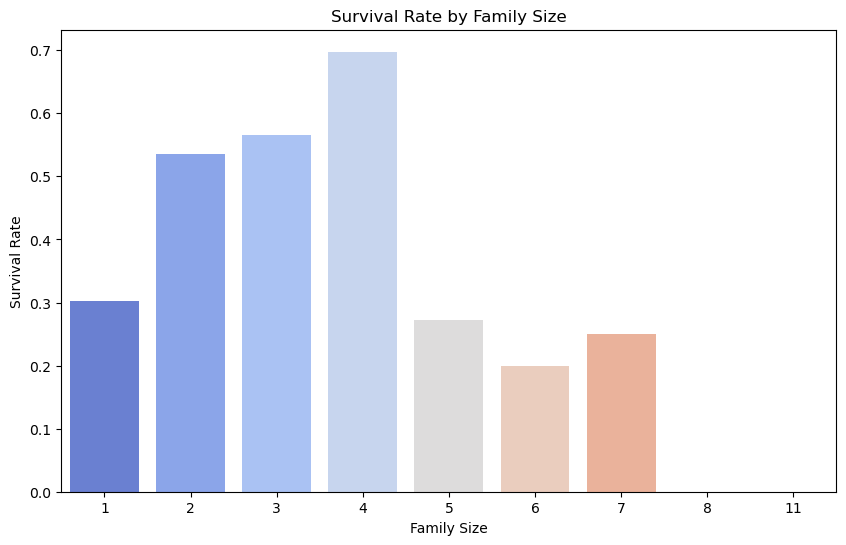

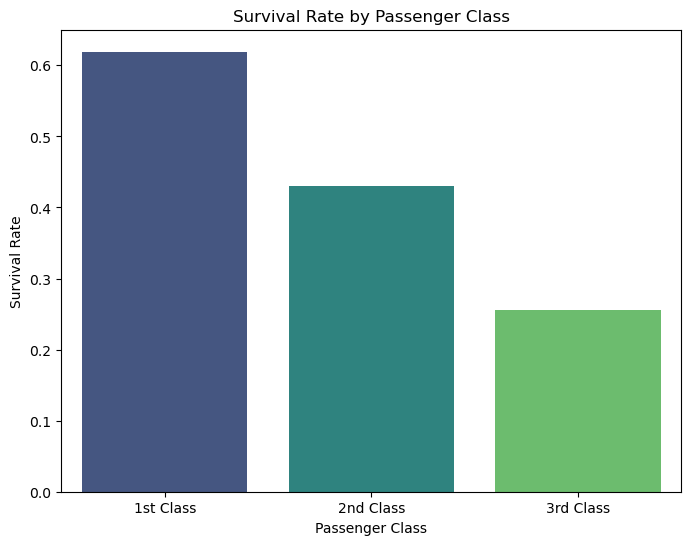

In [1008]:
print(df.isnull().sum())
print(df.describe())

# Survival Rate by Family (Bar Graph)
df['family_size'] = df['sibsp'] + df['parch'] + 1 
plt.figure(figsize=(10, 6))
sns.barplot(x='family_size', y='survived', data=df, ci=None, palette='coolwarm')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()


# Survival Rate by Passenger Class (Bar Graph)
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=df, ci=None, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.show()

### Task 1 Explanation:

#### Analysis of data:
* The dataset consists of 1309 records with 14 columns, including categorical and numerical features. 
* There are missing values in the 'age', 'fare', 'cabin', 'embarked', 'boat', 'body', and 'home.dest' columns.
* The 'cabin', 'boat', and 'body' columns have excessive missing values and are dropped.

#### Analysis of plot #1:
The visualisation that draws a relation between survival rate and family size visualization helps us understand whether traveling with family affected a passenger's likelihood of survival on the Titanic.

Observations:
* Passengers with a small family size, containing 1-3 members, had a higher survival rate. Possibly due to smaller families finding it easier to stay together and find free spots on lifeboats.
* Passengers traveling alone had a lower survival rate. This could be because they had fewer people looking out for them in the chaos.
* Large families, containing over 5 members, had lower survival rates. This could be due to limited space on lifeboats forcing families to leave some members behin

#### Analysis of plot #2:
The survival rate is highest for 1st class passengers and lowest for 3rd class passengers. This could suggest that social and economic status influenced survival chances, as higher-class passengers had better access to lifeboats.

In [1009]:
# Task 2

# Finding missing values
missing_values = df.isnull().sum()
print("Number of missing values per column:")
print(missing_values[missing_values > 0])

Number of missing values per column:
age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [1010]:
# Drop columns that are not needed for the prediction
df.drop(columns=['cabin', 'boat', 'body', 'name', 'ticket', 'home.dest'], inplace=True)  
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True) # Using mode [0] so the first mode is chosen incase there are multiple modes
df['fare'].fillna(df['fare'].median(), inplace=True)  

missing_values = df.isnull().sum()
print('Number of missing values per column:')
print(missing_values)

Number of missing values per column:
pclass         0
survived       0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
family_size    0
dtype: int64


### Task 2 Explanation:
* Columns cabin, boat, body were dropped because they had over 75% missing values. This makes the data unreliable to generalise.
* Columns name, ticket, and home.dest were dropped because they are not essential for survival prediction.
* Missing values in Age column were replaced wih median age. Median was chosen as it is less affected by outliers than mean is.
* Missing values in Embarked column were replaced with the mode port. This statistic was chosen as there were only 2 missing values, hence, using the most common port to fill the missing value has the highest possibility of being accurate. 
* Missing values in Fare were replaced with 
* home.dest is not Since this feature is not essential for survival prediction but could have some value, a placeholder (-1) was used.

In [1011]:
# Task 3
from sklearn.preprocessing import OneHotEncoder

# One-hot encode 'sex' and 'embarked'
df = pd.get_dummies(df, columns=['sex', 'embarked'])
df.head()

,pclass,survived,age,sibsp,parch,fare,family_size,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,1,1,0,0,0,1
1,1,1,0.9167,1,2,151.5500,4,0,1,0,0,1
2,1,0,2.0000,1,2,151.5500,4,1,0,0,0,1
3,1,0,30.0000,1,2,151.5500,4,0,1,0,0,1
4,1,0,25.0000,1,2,151.5500,4,1,0,0,0,1


### Task 3 explanation:
* One-hot encoding was used for 'sex' and 'embarked' as both of these columns are categorical variables that can be converted into binary columns.
* One-hot encoding is used because Machine learning models cannot process text data, so these categories must be converted into numerical variables.
* The sex column has two categories: male and female
* The embarked column has three categories: C, Q, & S

In [1012]:
# Task 4
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns
numerical_cols = ['age', 'fare', 'sibsp', 'parch']

# Apply Standardization
st_scaler = StandardScaler()
df[num_cols] = st_scaler.fit_transform(df[num_cols])
df.head()

,pclass,survived,age,sibsp,parch,fare,family_size,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,-0.039005,-0.479087,-0.445000,3.442584,1,1,0,0,0,1
1,1,1,-2.215952,0.481288,1.866526,2.286639,4,0,1,0,0,1
2,1,0,-2.131977,0.481288,1.866526,2.286639,4,1,0,0,0,1
3,1,0,0.038512,0.481288,1.866526,2.286639,4,0,1,0,0,1
4,1,0,-0.349075,0.481288,1.866526,2.286639,4,1,0,0,0,1


In [1013]:
# Apply Normalisation

mm_scaler = MinMaxScaler()
df[num_cols] = mm_scaler.fit_transform(df[num_cols])
df.head()

,pclass,survived,age,sibsp,parch,fare,family_size,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,0.361169,0.000,0.000000,0.412503,1,1,0,0,0,1
1,1,1,0.009395,0.125,0.222222,0.295806,4,0,1,0,0,1
2,1,0,0.022964,0.125,0.222222,0.295806,4,1,0,0,0,1
3,1,0,0.373695,0.125,0.222222,0.295806,4,0,1,0,0,1
4,1,0,0.311064,0.125,0.222222,0.295806,4,1,0,0,0,1


### Task 4 Explanation:
* Numerical columns such as 'age' and 'fare' have different scales. Therefore, feaure scaling avoids features having larger ranges from dominating features with smaller ranges. For example, 'fare' can range from 0 to over 500, while 'age' ranges from 0 to 80.

##### Standardization:
* It converts values into having a mean of 0 and a standard deviation of 1. This makes all features able to contribute equally to the model. 

##### Normalization (MinMaxScaler):
* Converts values so they are between 0 and 1.

* For this assignment: since we are using Logistic Regression, Standardization is the better choice. As it ensures that fare and age are treated equally by the model which improving accuracy. It also handles outliers better than normalization because it doesn’t force values into a defined range but instead keeps their relative importance.

In [1014]:
# Task 5

from sklearn.model_selection import train_test_split

X = df.drop(columns=['survived'])  # Features
y = df['survived']  # Target variable

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42,stratify=y_temp)

In [1015]:
print("Training set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)
print("Test set size:", X_test.shape, y_test.shape)

Training set size: (916, 11) (916,)
Validation set size: (196, 11) (196,)
Test set size: (197, 11) (197,)


### Task 5 Explanation:

We divide the dataset into three parts—training, validation, and test sets to make sure our machine learning model learns properly and is tested fairly. The training set (70%) is used to teach the model how different factors (such as age and fare) affect survival. The validation set (15%) helps improve the model and adjust settings to improve accuracy. And, the test set (15%) is used for the final evaluation to see how well the model can predict survival on unknown data. Since the Titanic dataset is imbalanced (more people died than survived), we use stratification to make sure that the survival rate stays the same in all three sets. This prevents the model from learning in a biased way and makes reliable predictions. 

In [1016]:
# Checking if all columns are numeric before using SMOTE
print("Non-numeric columns in X_train:", X_train.select_dtypes(exclude=[np.number]).columns)

# Converting all remaining categorical columns to numeric 
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_val = X_val.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Drop any 'NaN' values before SMOTE
print("NaN values before dropping in X_train:", X_train.isnull().sum())
X_train.dropna(inplace=True)
X_val.dropna(inplace=True)
X_test.dropna(inplace=True)

# Ensure y_train is still aligned
y_train = y_train.loc[X_train.index]

# Addressing Class Imbalance using SMOTE 
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(y_train_resampled.value_counts())

Non-numeric columns in X_train: Index([], dtype='object')
NaN values before dropping in X_train: pclass         0
age            0
sibsp          0
parch          0
fare           0
family_size    0
sex_female     0
sex_male       0
embarked_C     0
embarked_Q     0
embarked_S     0
dtype: int64
0    566
1    566
Name: survived, dtype: int64


### Task 6 Explanation:

* I chose SMOTE over ADASYN because it provides a more balanced and stable dataset without adding unnecessary data. The Titanic dataset already has clear survival patterns and ADASYN focuses too much on cases that are harder to decode. This would lead to us creating unrealistic data, for a problem that can be solved using the real survival patterns.

* For this I frist checked that all the columns are numeric because SMOTE only works with numeric data. Then, I printed the number of missing values in X_train and then dropped any rows that still have missing values to avoid errors. Since we removed some rows from X_train, we make sure y_train stays in sync with the updated data. SMOTE generates new synthetic survivor cases to balance the dataset so the model learns equally from both survivors and non-survivors. After applying SMOTE, I printed the updated counts of survivors and non-survivors to confirm that the dataset is now balanced. 

* 0 represents the number of non-survivers and 1 represents the number of survivors

In [1017]:
# Task 7

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)  
lasso.fit(X_train_resampled, y_train_resampled)

# Identify important features
selected_features = X_train_resampled.columns[lasso.coef_ != 0]
X_train_selected = X_train_resampled[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

print("Selected Features:", selected_features)

Selected Features: Index(['pclass', 'age', 'family_size', 'sex_male', 'embarked_C'], dtype='object')


### Task 7 Explanation:

* L1-Regularization was used to remove unimportant features and keep only the most useful ones for predicting survival. If a feature isn't important in the prediction, L1 shrinks its importance to zero causing the model to ignore it. This will make the prediction more accurate as it isn't fed with unnecessary data.

* Features are selected after splitting to avoid data leakage. This allows the model to learn patterns naturally and later apply them on the unseen data. 

* L1-Regularization is useful for the Titanic dataset because some features may not contribute much to survival prediction. By removing unnecessary features, the model learns more meaningful survival patterns and performs better on new data. 

In [1018]:
# Task 8: Training Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train_selected, y_train_resampled)

y_pred = model.predict(X_val_selected)

# Model Evaluation
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Validation Accuracy: 0.8163265306122449
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       121
           1       0.73      0.81      0.77        75

    accuracy                           0.82       196
   macro avg       0.81      0.82      0.81       196
weighted avg       0.82      0.82      0.82       196



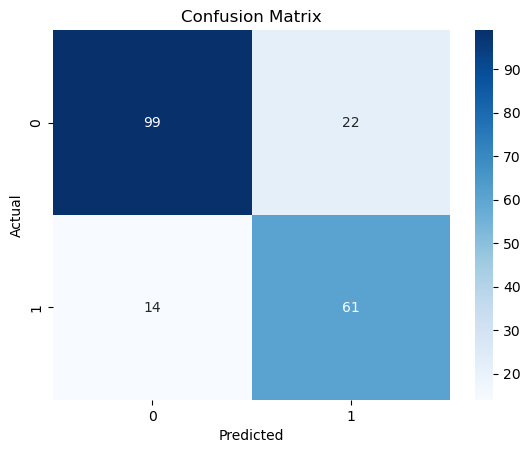

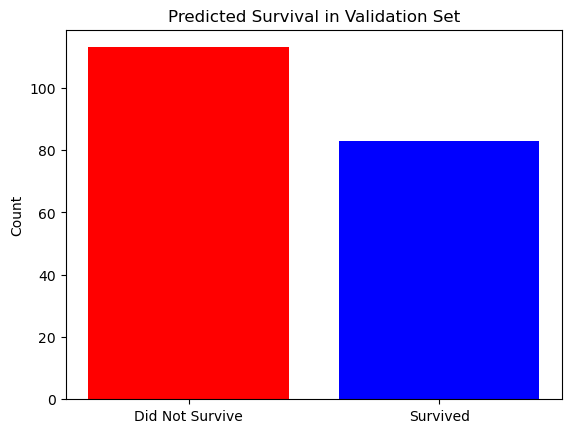

In [1019]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix 
cm = confusion_matrix(y_val, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Bar Chart (Survived vs. not survived)
plt.bar(["Did Not Survive", "Survived"], [sum(y_pred == 0), sum(y_pred == 1)], color=["red", "blue"])
plt.ylabel("Count")
plt.title("Predicted Survival in Validation Set")
plt.show()

### Task 8 Explanation:

* Finally, the Logistic Regression model is trained using X_train_selected (the important features from the training data) and y_train_resampled (the balanced survival labels). The model looks at patterns in the data and learns how factors like pclass, age, family size, sex_male, and embarked_C affect survival.

* Once the model is trained, it is tested on X_val_selected (the validation data) to see how well it makes predictions. The predictions are stored in y_pred, and we check how accurate they are by comparing them to y_val (the actual survival outcomes).